In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
data=pd.read_csv('data2.csv')
data.head()
Y=data['h_score']
X=data[data.columns.difference(['h_score'])]


In [326]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

class linear_regression():
    def __init__(self,poly=1):
        self.poly=poly
        self.phi=None
        self.phi_original=None
        self.weights=None
        self.Y=None
        self.rmserr=100.0
    
    def transform_feature(self,mat):
        retval=mat
        for fi in xrange(mat.shape[1]):
            for i in xrange(self.poly-1):
                retval=np.hstack((retval,mat[:,fi].reshape((mat.shape[0],1))**(i+2)))
        retval=np.hstack((retval,np.ones(mat.shape[0]).reshape((mat.shape[0],1))))
        return retval
    
    def fit(self,X,Y,algo='ls'):
        self.phi=X.as_matrix()
        self.phi_original=X.as_matrix()
        self.Y=Y.as_matrix()
        self.phi=self.transform_feature(self.phi)
        if algo=='ls':
            self.least_squared_fit()
        
    def least_squared_fit(self):
        #phiT
        phi_t=self.phi.transpose()
        #(phiT*phi)
        temp_l=np.matmul(phi_t,self.phi)
        #inv(phiT*phi)
        phi_inv=np.linalg.inv(temp_l)
        #inv(phiT*phi)*phi
        temp_l_2=np.matmul(phi_inv,phi_t)
        #w=inv(phiT*phi)*phi*Y
        self.weights=np.matmul(temp_l_2,self.Y)
        #row vector to column vector weights
        self.weights=self.weights.reshape((self.weights.size,1))
        #calculate training rmse
        #self.rmserr=self.rmse(self.phi_original,self.Y)
        print '<< DONE TRAINING  >>'

    
    def predict(self,x):
        return np.matmul(self.weights.transpose(),self.transform_feature(x).transpose()).transpose()
    
    def rmse(self,x,y):
        err=0.0
        err=((y-self.predict(x))**2).sum()/y.size
        err=err**.5
        return err
        
    def print_weights(self):
        print self.weights



Populating the interactive namespace from numpy and matplotlib


<< DONE TRAINING  >>
7.97098202982


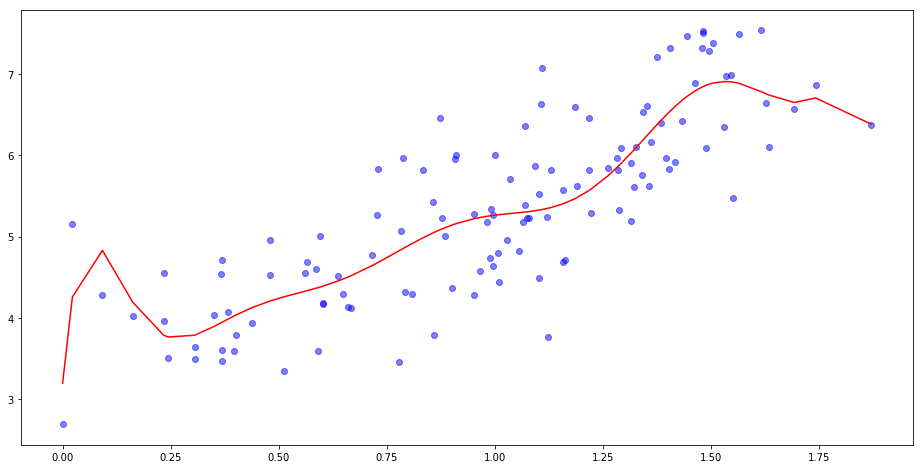

In [335]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

l=linear_regression(poly=10)
l.fit(X_train,Y_train)
print l.rmse(X_test.as_matrix(),Y_test.as_matrix())

plt.scatter(X_train,Y_train, alpha=0.5,color='blue')
features,predictions=zip(*(sorted(zip(X_train.as_matrix(), l.predict(X_train.as_matrix())))))
plt.plot(features,predictions,'k',color='red')
plt.show()

In [349]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

X_train=train[['LotArea','OverallQual','OverallCond','YearBuilt','1stFlrSF','GrLivArea']]
Y_train=train[['SalePrice']]
X_test=test[['LotArea','OverallQual','OverallCond','YearBuilt','1stFlrSF','GrLivArea']]
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
result=pd.DataFrame(test['Id'])

l2=linear_regression(poly=3)
l2.fit(X_train,Y_train)
print l2.rmse(X_test.as_matrix(),Y_test.as_matrix())

l.print_weights()
result['SalePrice']=pd.Series(l2.predict(X_test.as_matrix()).flatten())
result.head()

result.to_csv('submission.csv',index=False)


<< DONE TRAINING  >>
33107.8258289
[[  6.27069320e+01]
 [ -7.92878456e+02]
 [  4.30972886e+03]
 [ -1.28172455e+04]
 [  2.30661090e+04]
 [ -2.61592240e+04]
 [  1.87818922e+04]
 [ -8.27067983e+03]
 [  2.03605520e+03]
 [ -2.14399348e+02]
 [  3.19961083e+00]]
